In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Potential (V)': [25, 22.5, 20, 15, 10, 7.5, 5],
    'Distance from 30V (cm)': [3.25, 5.85, 9.48, 16.88, 24.20, 26.75, 29.10]
}

data['dV'] = np.gradient(data['Potential (V)'])
data['ds'] = np.gradient(data['Distance from 30V (cm)'])
data['E'] = data['dV'] / data['ds']

df = pd.DataFrame(data)
df

,Potential (V),Distance from 30V (cm),dV,ds,E
0,25.0,3.25,-2.50,2.600,-0.961538
1,22.5,5.85,-2.50,3.115,-0.802568
2,20.0,9.48,-3.75,5.515,-0.679964
3,15.0,16.88,-5.00,7.360,-0.679348
4,10.0,24.20,-3.75,4.935,-0.759878
5,7.5,26.75,-2.50,2.450,-1.020408
6,5.0,29.10,-2.50,2.350,-1.063830


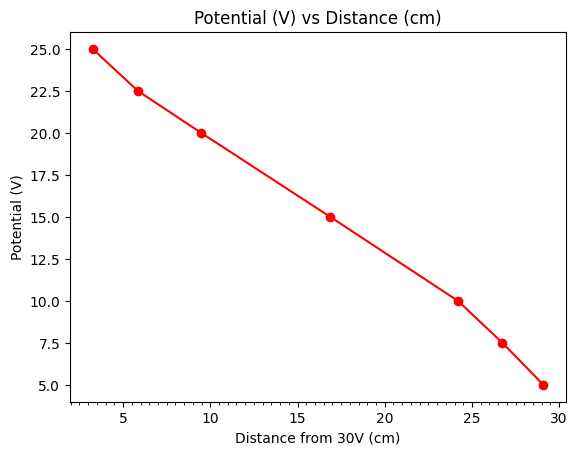

In [3]:
fig,ax = plt.subplots()

ax.plot(df['Distance from 30V (cm)'], df['Potential (V)'], color='red', marker='o')
plt.title('Potential (V) vs Distance (cm)')
plt.ylabel('Potential (V)')
plt.xlabel('Distance from 30V (cm)')

# minor and major x ticks set to every 5 and ever 1 respectively
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.savefig('potenvial_vs_distance_nf.png', dpi=300)

E: 0.738977


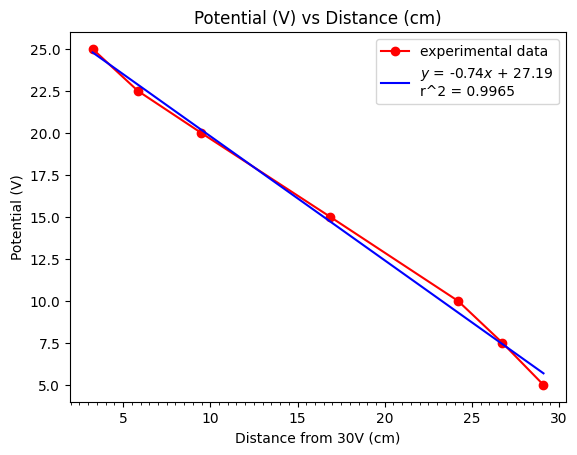

In [4]:
m, b = np.polyfit(df['Distance from 30V (cm)'], df['Potential (V)'], 1)
r2 = np.corrcoef(df['Distance from 30V (cm)'], df['Potential (V)'])[0,1]**2

fig,ax = plt.subplots()

plt.plot(df['Distance from 30V (cm)'], df['Potential (V)'], color='red', marker='o', label='experimental data')
plt.plot(df['Distance from 30V (cm)'], m*df['Distance from 30V (cm)'] + b, color='blue', label='$y$ = {:.2f}$x$ + {:.2f}\nr^2 = {:.4f}'.format(m, b, r2))

plt.title('Potential (V) vs Distance (cm)')
plt.ylabel('Potential (V)')
plt.xlabel('Distance from 30V (cm)')
plt.legend()


ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.savefig('potenvial_vs_distance_fit.png', dpi=300)

print(f'E: {-m:.06f}')

average: -0.8525


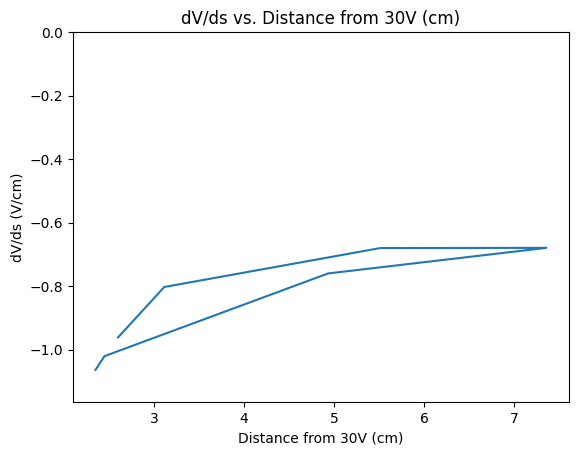

In [5]:
# plot derivative of the potential as a function of distance

x = df['ds']
y = df['E']
print(f'average: {y.mean():.4f}')

plt.plot(x,y)
plt.ylim(y.min()-0.1,0)
plt.title('dV/ds vs. Distance from 30V (cm)')
plt.xlabel('Distance from 30V (cm)')
plt.ylabel('dV/ds (V/cm)')

plt.savefig('dvds vs dist.png', dpi=300)

average: -0.8525


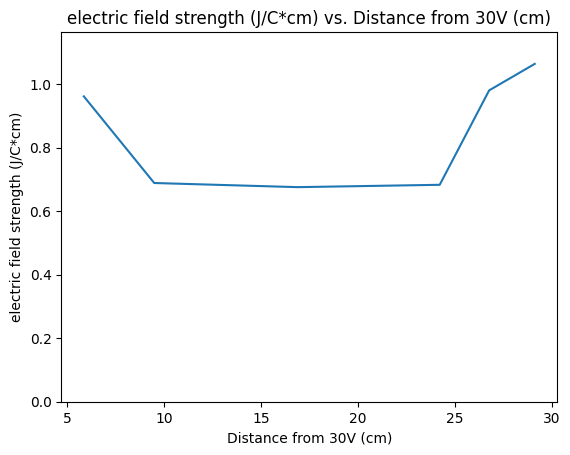

In [6]:
# plot derivative of the potential as a function of distance

x = df['Distance from 30V (cm)']
y1 = np.abs(df['Potential (V)'].diff()) / df['Distance from 30V (cm)'].diff()
print(f'average: {y.mean():.4f}')

plt.plot(x,y1)
plt.ylim(0,y1.max()+0.1)
plt.title('electric field strength (J/C*cm) vs. Distance from 30V (cm)')
plt.xlabel('Distance from 30V (cm)')
plt.ylabel('electric field strength (J/C*cm)')

plt.savefig('field vs dist.png', dpi=300)

# theoretical

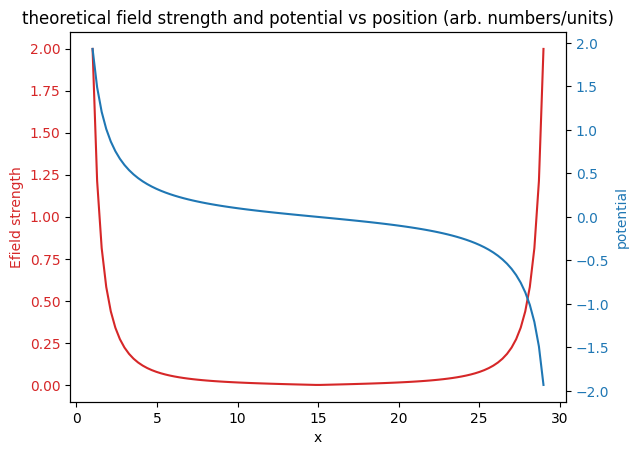

In [35]:
k = 1
q1 = 2
q2 = -2

x = np.linspace(1, 29, 100)

Efield = np.abs((k * q1 / x**2) + (k * q2 / (30 - x)**2))
V = (k * q1 / x) + (k * q2 / (30 - x))
# plot on 2 y axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('Efield strength', color=color)
ax1.plot(x, Efield, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('potential', color=color)
ax2.plot(x, V, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('theoretical field strength and potential vs position (arb. numbers/units)');
plt.savefig('theoretical field strength and potential vs position.png', dpi=300)